In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('C:/Users/ishit/Desktop/Indian Liver Patient Dataset (ILPD).csv')

In [3]:
data

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
# Explore the data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
# we have missing values in alkphos

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               579 non-null    int64  
 1   gender            579 non-null    object 
 2   tot_bilirubin     579 non-null    float64
 3   direct_bilirubin  579 non-null    float64
 4   tot_proteins      579 non-null    int64  
 5   albumin           579 non-null    int64  
 6   ag_ratio          579 non-null    int64  
 7   sgpt              579 non-null    float64
 8   sgot              579 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [9]:
# some tranformation

In [10]:
data['gender']=data['gender'].apply(lambda x:1 if x=='Male'else 0)

In [11]:
data['is_patient'].replace(2,0,inplace=True)

In [12]:
data.drop(columns=['tot_bilirubin','direct_bilirubin','sgpt','sgot','alkphos'],inplace=True)

In [13]:
data

,age,gender,tot_proteins,albumin,ag_ratio,is_patient
0,65,0,187,16,18,1
1,62,1,699,64,100,1
2,62,1,490,60,68,1
3,58,1,182,14,20,1
4,72,1,195,27,59,1
...,...,...,...,...,...,...
578,60,1,500,20,34,0
579,40,1,98,35,31,1
580,52,1,245,48,49,1
581,31,1,184,29,32,1


In [14]:
# 1-------> person having liver disease
# 0-------> person not having liver disease

<Figure size 1800x576 with 0 Axes>

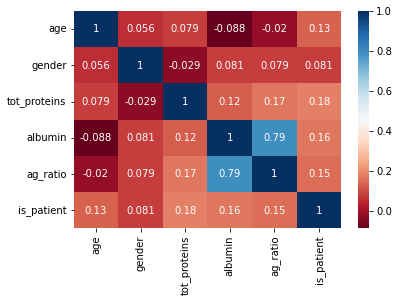

<Figure size 1800x576 with 0 Axes>

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.figure(figsize=(25,8))

## Data analysis on person having liver disease

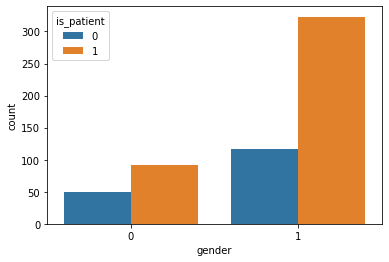

In [16]:
sns.countplot(data['gender'],hue=data['is_patient'])
plt.show()

In [17]:
# the above graph shows that male 

In [18]:
data_gender = data.groupby(by=['gender','is_patient'])['is_patient'].count()

In [19]:
print('Female_patient : %.2f %% '%(data_gender[0][1]/(data_gender[0][0]+data_gender[0][1])*100))
print('Male_patient : %.2f %% '%(data_gender[1][1]/(data_gender[1][0]+data_gender[1][1])*100))

Female_patient : 65.00 % 
Male_patient : 73.58 % 


In [20]:
data['age'].unique()

array([65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 74, 61, 25, 38, 33, 40,
       51, 63, 34, 20, 84, 52, 30, 48, 47, 45, 42, 50, 85, 35, 21, 32, 31,
       54, 37, 66, 60, 19, 75, 68, 70, 49, 14, 13, 18, 39, 27, 36, 24, 28,
       53, 15, 56, 44, 41,  7, 22,  8,  6,  4, 43, 23, 12, 69, 16, 78, 11,
       73, 67, 10, 90], dtype=int64)

In [21]:
def age_category(age):
    if age>=4 and age<=12:
        return('child')
    elif age<=13 and age<=17:
        return('adoloscent')
    elif age>=18 and age<=50:
        return('adult')
    else:
        return('elderly')

In [22]:
data['AgeCategory'] = data['age'].apply(age_category)

In [23]:
data

,age,gender,tot_proteins,albumin,ag_ratio,is_patient,AgeCategory
0,65,0,187,16,18,1,elderly
1,62,1,699,64,100,1,elderly
2,62,1,490,60,68,1,elderly
3,58,1,182,14,20,1,elderly
4,72,1,195,27,59,1,elderly
...,...,...,...,...,...,...,...
578,60,1,500,20,34,0,elderly
579,40,1,98,35,31,1,adult
580,52,1,245,48,49,1,elderly
581,31,1,184,29,32,1,adult


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

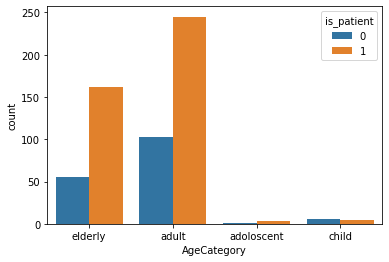

In [24]:
sns.countplot(data['AgeCategory'],hue=data['is_patient'])

In [25]:
pd.crosstab(data['AgeCategory'],data['is_patient'])

is_patient,0,1
AgeCategory,,
adoloscent,1,3
adult,103,245
child,6,4
elderly,55,162


## Detecting and Treating the outlier

<AxesSubplot:xlabel='age'>

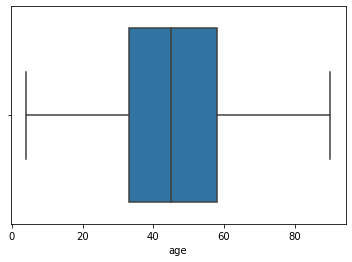

In [26]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='albumin'>

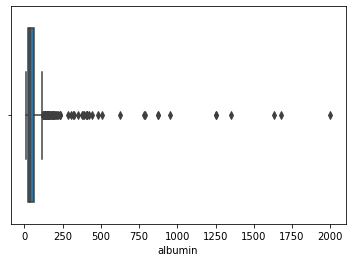

In [27]:
sns.boxplot(data['albumin'])

In [28]:
data[data['albumin']>1000]

,age,gender,tot_proteins,albumin,ag_ratio,is_patient,AgeCategory
27,34,1,240,1680,850,1,adult
47,40,1,230,1630,960,1,adult
117,32,1,194,2000,2946,1,adult
118,32,1,280,1350,1600,1,adult
119,32,1,298,1250,1050,1,adult
135,66,1,1110,1250,4929,1,elderly


In [32]:
ul=np.percentile(data['albumin'],95)
data['albumin']=np.where(data['albumin']>ul,ul,data['albumin'])


<AxesSubplot:xlabel='ag_ratio'>

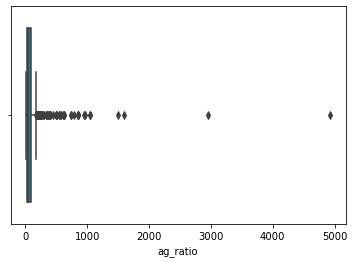

In [33]:
sns.boxplot(data['ag_ratio'])

In [34]:
data[data['ag_ratio']>1000]

,age,gender,tot_proteins,albumin,ag_ratio,is_patient,AgeCategory
117,32,1,194,232.1,2946,1,adult
118,32,1,280,232.1,1600,1,adult
119,32,1,298,232.1,1050,1,adult
135,66,1,1110,232.1,4929,1,elderly
199,7,0,1420,232.1,1050,1,child
207,40,1,350,232.1,1500,1,adult


In [35]:
ul=np.percentile(data['ag_ratio'],95)
data['ag_ratio']=np.where(data['ag_ratio']>ul,ul,data['ag_ratio'])


<AxesSubplot:xlabel='tot_proteins'>

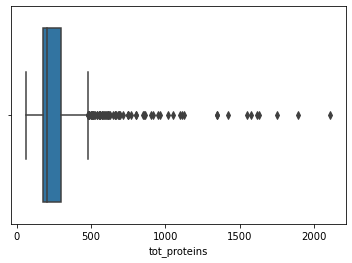

In [36]:
sns.boxplot(data['tot_proteins'])

In [37]:
data[data['tot_proteins']>1500]

,age,gender,tot_proteins,albumin,ag_ratio,is_patient,AgeCategory
77,68,0,1620,95.0,127.0,1,elderly
115,50,1,1580,88.0,64.0,0,adult
116,48,1,1630,74.0,149.0,1,adult
128,58,0,1896,61.0,83.0,1,elderly
233,33,1,2110,48.0,89.0,1,adult
429,73,1,1750,102.0,141.0,1,elderly
447,45,0,1550,232.1,401.4,1,adult


In [38]:
# we will cap the outlier to 95th percentile
np.percentile(data['tot_proteins'],95)

701.0000000000005

In [39]:
ul = np.percentile(data['tot_proteins'],95)

In [40]:
data['tot_proteins']=np.where(data['tot_proteins']>ul,ul,data['tot_proteins'])

In [41]:
data.head()

,age,gender,tot_proteins,albumin,ag_ratio,is_patient,AgeCategory
0,65,0,187.0,16.0,18.0,1,elderly
1,62,1,699.0,64.0,100.0,1,elderly
2,62,1,490.0,60.0,68.0,1,elderly
3,58,1,182.0,14.0,20.0,1,elderly
4,72,1,195.0,27.0,59.0,1,elderly


In [42]:
data.drop(columns=['AgeCategory'],inplace=True)

## Feature Engineering

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
data_s = sc.fit_transform(data)

In [46]:
data_s

array([[ 1.24740264, -1.77079482, -0.54191997, -0.73044726, -0.64698282,
         0.63130874],
       [ 1.06230624,  0.56471817,  2.84348678,  0.11788851,  0.18908002,
         0.63130874],
       [ 1.06230624,  0.56471817,  1.46155316,  0.04719387, -0.13718841,
         0.63130874],
       ...,
       [ 0.44531827,  0.56471817, -0.15841686, -0.16489008, -0.33091029,
         0.63130874],
       [-0.85035649,  0.56471817, -0.56175634, -0.50068965, -0.50424039,
         0.63130874],
       [-0.4184649 ,  0.56471817, -0.35016842, -0.64207895, -0.58580749,
        -1.58401102]])

In [47]:
pd.DataFrame(data_s,columns=data.columns)

,age,gender,tot_proteins,albumin,ag_ratio,is_patient
0,1.247403,-1.770795,-0.541920,-0.730447,-0.646983,0.631309
1,1.062306,0.564718,2.843487,0.117889,0.189080,0.631309
2,1.062306,0.564718,1.461553,0.047194,-0.137188,0.631309
3,0.815511,0.564718,-0.574981,-0.765795,-0.626591,0.631309
4,1.679294,0.564718,-0.489023,-0.536037,-0.228951,0.631309
...,...,...,...,...,...,...
574,0.938909,0.564718,1.527674,-0.659753,-0.483849,-1.584011
575,-0.295067,0.564718,-1.130399,-0.394648,-0.514436,0.631309
576,0.445318,0.564718,-0.158417,-0.164890,-0.330910,0.631309
577,-0.850356,0.564718,-0.561756,-0.500690,-0.504240,0.631309


## Train Test Split

In [48]:
y= data['is_patient']
x=data.drop(columns=['is_patient'])

In [49]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: is_patient, Length: 579, dtype: int64

In [50]:
x

,age,gender,tot_proteins,albumin,ag_ratio
0,65,0,187.0,16.0,18.0
1,62,1,699.0,64.0,100.0
2,62,1,490.0,60.0,68.0
3,58,1,182.0,14.0,20.0
4,72,1,195.0,27.0,59.0
...,...,...,...,...,...
578,60,1,500.0,20.0,34.0
579,40,1,98.0,35.0,31.0
580,52,1,245.0,48.0,49.0
581,31,1,184.0,29.0,32.0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [53]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(463, 5) (463,)
(116, 5) (116,)


## Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model_lr = LogisticRegression()

In [56]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = model_lr.predict(x_test)

In [58]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred}).head(20)

,Actual Y,Predicted Y
111,1,1
4,1,1
408,1,1
577,1,1
155,1,1
136,1,1
32,0,1
125,0,1
501,1,1
94,1,1


## Validation

In [59]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,log_loss,confusion_matrix,precision_score

In [60]:
def validation(test,pred):
    print('confusion matrix:\n',confusion_matrix(test,pred))
    print('accuracy:',accuracy_score(test,pred))
    print('recall:',recall_score(test,pred))
    print('f1 score:',f1_score(test,pred))
    print('Precision score:',precision_score(test,pred))

In [61]:
validation(y_test,y_pred)

confusion matrix:
 [[ 7 26]
 [ 4 79]]
accuracy: 0.7413793103448276
recall: 0.9518072289156626
f1 score: 0.8404255319148937
Precision score: 0.7523809523809524


In [62]:
from sklearn.model_selection import GridSearchCV

## Risge Lasso

In [ ]:
from sklearn.model_selection import 

## Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model_dt = DecisionTreeClassifier()

In [73]:
param = {'criterion':['gini','entropy'],
        'max_depth':[4,5,6,7,8]}

In [74]:
gscv = GridSearchCV(estimator=model_dt,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3)

In [75]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.688 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.667 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.699 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.674 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.641 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.634 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.677 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.699 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.630 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.587 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.667 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]},
             scoring='accuracy', verbose=3)

In [76]:
gscv.best_score_

0.7018934081346424

In [77]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [80]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [81]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [82]:
model_dt.score(x_test,y_test)

0.75

In [85]:
y_pred_dt = model_dt.predict(x_test)

In [86]:
validation(y_test,y_pred_dt)

confusion matrix:
 [[12 21]
 [ 8 75]]
accuracy: 0.75
recall: 0.9036144578313253
f1 score: 0.8379888268156425
Precision score: 0.78125


## Ensemble Models

## Bagging(Random forest)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model_rf = RandomForestClassifier()

In [89]:
param ={'n_estimators':[50,100,150,200],
       'max_features':[3,4,5],
       'criterion':['gini','entropy']}

In [90]:
gscv = GridSearchCV(estimator=model_rf,
                   param_grid=param,
                   scoring='accuracy',
                   verbose=3,
                   cv=3)

In [91]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.703 total time=   0.0s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.701 total time=   0.0s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=50;, score=0.636 total time=   0.0s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.697 total time=   0.1s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.675 total time=   0.1s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=100;, score=0.662 total time=   0.1s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=150;, score=0.690 total time=   0.2s
[CV 2/3] END criterion=gini, max_features=3, n_estimators=150;, score=0.688 total time=   0.2s
[CV 3/3] END criterion=gini, max_features=3, n_estimators=150;, score=0.675 total time=   0.1s
[CV 1/3] END criterion=gini, max_features=3, n_estimators=200;, score=0.690 total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

In [96]:
gscv.best_score_

0.6846529814271749

In [97]:
gscv.best_params_

{'criterion': 'gini', 'max_features': 3, 'n_estimators': 150}

In [99]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [102]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=150)

In [103]:
y_pred_rf = model_rf.predict(x_test)

In [104]:
validation(y_test,y_pred_rf)

confusion matrix:
 [[11 22]
 [ 7 76]]
accuracy: 0.75
recall: 0.9156626506024096
f1 score: 0.839779005524862
Precision score: 0.7755102040816326


In [105]:
model_rf.score(x_train,y_train)

1.0

## Boosting(ADA Boost)

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
model_ada = AdaBoostClassifier()

In [108]:
param = {'n_estimators':[50,100,150,200],
        'learning_rate':[0.001,0.01,0,1,1]}

In [109]:
gscv = GridSearchCV(estimator=model_ada,
                   param_grid=param,
                   scoring='f1',
                   verbose=3,
                   cv=3)

In [110]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=0.835 total time=   0.0s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=0.833 total time=   0.0s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=0.835 total time=   0.1s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=0.833 total time=   0.1s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=0.833 total time=   0.1s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=0.835 total time=   0.1s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=0.833 total time=   0.2s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=0.833 total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=200;, score=0.835 total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=200;, score=0.833 total time=   0.2s
[CV 3/3] END learn

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0, 1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1', verbose=3)

In [111]:
gscv.best_score_

0.8337510442773599

In [112]:
gscv.best_params_

{'learning_rate': 0.001, 'n_estimators': 50}

In [113]:
import sklearn
sorted((sklearn.metrics.SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [115]:
model_ada = AdaBoostClassifier(**gscv.best_params_)

In [116]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.001)

In [117]:
y_pred_ada = model_ada.predict(x_test)

In [118]:
validation(y_test,y_pred_ada)

confusion matrix:
 [[ 0 33]
 [ 0 83]]
accuracy: 0.7155172413793104
recall: 1.0
f1 score: 0.8341708542713567
Precision score: 0.7155172413793104


In [121]:
model_ada.score(x_train,y_train)

0.714902807775378

## Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
model_gb = GradientBoostingClassifier()

In [124]:
param ={'n_estimators':[50,100,150,200],
       'learning_rate':[0.01,0.1,1,10],
       'max_features':[3,4,5]}

In [125]:
gscv = GridSearchCV(estimator=model_gb,
                   param_grid=param,
                   verbose=3,
                   cv=3,
                   scoring='accuracy')

In [126]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END learning_rate=0.01, max_features=3, n_estimators=50;, score=0.716 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=3, n_estimators=50;, score=0.714 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=3, n_estimators=50;, score=0.714 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_features=3, n_estimators=100;, score=0.716 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=3, n_estimators=100;, score=0.721 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=3, n_estimators=100;, score=0.708 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_features=3, n_estimators=150;, score=0.697 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=3, n_estimators=150;, score=0.695 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=3, n_estimators=150;, score=0.682 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_features=3, n

[CV 2/3] END learning_rate=1, max_features=4, n_estimators=100;, score=0.695 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=100;, score=0.701 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=4, n_estimators=150;, score=0.697 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=4, n_estimators=150;, score=0.721 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=150;, score=0.701 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.684 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.688 total time=   0.1s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.688 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=5, n_estimators=50;, score=0.697 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=5, n_estimators=50;, score=0.682 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_features': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

In [127]:
gscv.best_score_

0.7170506912442396

In [128]:
gscv.best_params_

{'learning_rate': 0.01, 'max_features': 4, 'n_estimators': 100}

In [134]:
model_gb =GradientBoostingClassifier(**gscv.best_params_)

In [135]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features=4)

In [137]:
y_pred_gb= model_gb.predict(x_test)

In [138]:
validation(y_test,y_pred_gb)

confusion matrix:
 [[ 1 32]
 [ 1 82]]
accuracy: 0.7155172413793104
recall: 0.9879518072289156
f1 score: 0.8324873096446701
Precision score: 0.7192982456140351


## XG Boost

In [139]:
from xgboost import XGBClassifier

In [140]:
model_xgb = XGBClassifier(eval_metric='logloss')

In [145]:
params = {'n_estimators':[50,100,150,200],
         'learning_rate':[0.01,0.1,1,10],
         'max_depth':[3,4,5]}

In [149]:
gscv = GridSearchCV(estimator=model_xgb,
                                 param_grid=params,
                                 verbose=3,
                                 cv=3,
                                 scoring='accuracy')

In [150]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.671 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.649 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.597 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.677 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.675 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.649 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.703 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.669 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=150;, score=0.636 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.716 

[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.662 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.716 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.662 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=100;, score=0.662 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=150;, score=0.729 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=150;, score=0.675 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=150;, score=0.669 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=200;, score=0.723 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=200;, score=0.682 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=200;, score=0.675 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=5, n_estimators=50;, score=0.67

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

In [151]:
gscv.best_score_

0.7083647535260438

In [152]:
gscv.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [154]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [155]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [156]:
y_pred_xgb = model_xgb.predict(x_test)

In [157]:
validation(y_test,y_pred_xgb)

confusion matrix:
 [[12 21]
 [13 70]]
accuracy: 0.7068965517241379
recall: 0.8433734939759037
f1 score: 0.8045977011494253
Precision score: 0.7692307692307693


## KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier


In [159]:
model_knn = KNeighborsClassifier(n_neighbors=7)

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
sc = StandardScaler()

In [167]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [168]:
pd.DataFrame(x_train,columns=x_train.columns)

,age,gender,tot_proteins,albumin,ag_ratio
83,33,1,258.0,194.0,152.0
89,60,1,238.0,119.0,350.0
447,45,0,701.0,232.1,401.4
278,45,1,209.0,25.0,20.0
122,58,1,188.0,60.0,84.0
...,...,...,...,...,...
132,18,0,199.0,34.0,31.0
41,62,1,160.0,42.0,110.0
295,22,1,202.0,78.0,41.0
57,48,0,175.0,24.0,54.0


In [169]:
model_knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=7)

In [171]:
y_pred_knn= model_knn.predict(x_test_s)

In [172]:
validation(y_test,y_pred_knn)

confusion matrix:
 [[16 17]
 [10 73]]
accuracy: 0.7672413793103449
recall: 0.8795180722891566
f1 score: 0.8439306358381503
Precision score: 0.8111111111111111
